In [17]:
import geopandas as gpd
import folium
from folium.features import GeoJsonPopup, GeoJsonTooltip
from folium import plugins
import os
import pathlib
import platform

In [18]:
platform.system()

'Darwin'

In [352]:
AUS_gdf_polygs = gpd.read_file('../QGIS/shapes/Australia.shp')
#CAN_gpd = gpd.read_file('../QGIS/shapes/Canada.shp')

In [353]:
AUS_gdf_polygs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [354]:
AUS_gdf_polygs = AUS_gdf_polygs.to_crs(epsg='3857')

In [355]:
AUS_gdf_points = AUS_gdf_polygs.copy()
AUS_gdf_points["geometry"] = AUS_gdf_points["geometry"].centroid

In [356]:
AUS_gdf_polygs

,id,Custodian,Dev date,Code,Rep link,Contact,geometry
0,1.0,CSIRO,1 Jan 2020,MF2005,www.csiro.au,Cookie monster,"POLYGON ((13542044.658 -2508778.676, 14090235...."
1,2.0,CSIRO,2 Jan 2020,MF6,www.csiro.au,Homer Simpson,"POLYGON ((14506650.543 -2751247.915, 15075926...."
2,3.0,CSIRO,3 Jan 2020,MF2000,www.csiro.au,Darth Vader,"POLYGON ((15850773.498 -2872482.534, 16551825...."
3,1.0,CSIRO,12 JAN 2021,MF,www.csiro.au,JCC,"POLYGON ((12901868.772 -3786058.941, 12913110...."
4,NaN,None,None,None,None,None,"POLYGON ((12901868.772 -3819630.285, 12922504...."
5,NaN,None,None,None,None,None,"POLYGON ((12911570.583 -3758339.482, 12942369...."
6,NaN,None,None,None,None,None,"POLYGON ((12887698.776 -3847267.853, 12903940...."
7,NaN,None,None,None,None,None,"POLYGON ((16432393.240 -4027816.377, 16486305...."
8,NaN,None,None,None,None,None,"POLYGON ((16369704.652 -3940888.201, 16440333...."
9,NaN,None,None,None,None,None,"POLYGON ((16601234.506 -4015696.583, 16648041...."


In [357]:
AUS_gdf_points = AUS_gdf_points.to_crs(epsg='4326')

In [358]:
AUS_gdf_points

,id,Custodian,Dev date,Code,Rep link,Contact,geometry
0,1.0,CSIRO,1 Jan 2020,MF2005,www.csiro.au,Cookie monster,POINT (124.14637 -23.55739)
1,2.0,CSIRO,2 Jan 2020,MF6,www.csiro.au,Homer Simpson,POINT (132.87240 -26.26562)
2,3.0,CSIRO,3 Jan 2020,MF2000,www.csiro.au,Darth Vader,POINT (145.56689 -28.29631)
3,1.0,CSIRO,12 JAN 2021,MF,www.csiro.au,JCC,POINT (115.92145 -32.26498)
4,NaN,None,None,None,None,None,POINT (115.97555 -32.49988)
5,NaN,None,None,None,None,None,POINT (116.08313 -32.07515)
6,NaN,None,None,None,None,None,POINT (115.83921 -32.71956)
7,NaN,None,None,None,None,None,POINT (147.91925 -34.06748)
8,NaN,None,None,None,None,None,POINT (147.44703 -33.43192)
9,NaN,None,None,None,None,None,POINT (149.49741 -34.23532)


In [359]:
AUS_gdf_points['lon'] = AUS_gdf_points.geometry.x
AUS_gdf_points['lat'] = AUS_gdf_points.geometry.y

In [360]:
AUS_gdf_points

,id,Custodian,Dev date,Code,Rep link,Contact,geometry,lon,lat
0,1.0,CSIRO,1 Jan 2020,MF2005,www.csiro.au,Cookie monster,POINT (124.14637 -23.55739),124.146370,-23.557393
1,2.0,CSIRO,2 Jan 2020,MF6,www.csiro.au,Homer Simpson,POINT (132.87240 -26.26562),132.872404,-26.265615
2,3.0,CSIRO,3 Jan 2020,MF2000,www.csiro.au,Darth Vader,POINT (145.56689 -28.29631),145.566885,-28.296309
3,1.0,CSIRO,12 JAN 2021,MF,www.csiro.au,JCC,POINT (115.92145 -32.26498),115.921451,-32.264984
4,NaN,None,None,None,None,None,POINT (115.97555 -32.49988),115.975553,-32.499880
5,NaN,None,None,None,None,None,POINT (116.08313 -32.07515),116.083134,-32.075148
6,NaN,None,None,None,None,None,POINT (115.83921 -32.71956),115.839212,-32.719560
7,NaN,None,None,None,None,None,POINT (147.91925 -34.06748),147.919253,-34.067483
8,NaN,None,None,None,None,None,POINT (147.44703 -33.43192),147.447029,-33.431923
9,NaN,None,None,None,None,None,POINT (149.49741 -34.23532),149.497409,-34.235316


<AxesSubplot:>

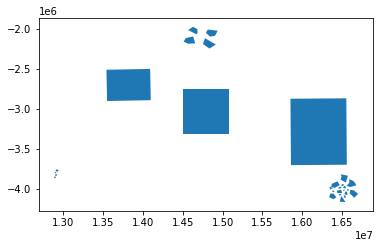

In [361]:
AUS_gdf_polygs.plot()

<AxesSubplot:>

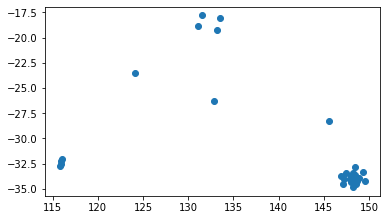

In [362]:
AUS_gdf_points.plot()

In [366]:
f = folium.Figure(width=1500, height=700)
map = folium.Map(location=[-26, 135], zoom_start=4, crs='EPSG3857').add_to(f)
folium.TileLayer('https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png', attr='x').add_to(map)
marker_cluster = plugins.MarkerCluster().add_to(map)

# 

# popup = GeoJsonPopup(
#     fields=["Custodian", "Dev date", "Code"],
#     aliases=["Custodian", "Dev date", "Code"],
#     localize=True,
#     labels=True,
#     style="background-color: yellow;",
# )

# tooltip = GeoJsonTooltip(
#     fields=["Custodian", "Dev date", "Code"],
#     aliases=["Custodian", "Dev date", "Code"],
#     localize=True,
#     sticky=False,
#     labels=True,
#     style="""
#         background-color: #F0EFEF;
#         border: 2px solid black;
#         border-radius: 3px;
#         box-shadow: 3px;
#     """,
#     max_width=800,
# )


for _, r in AUS_gdf_points.iterrows():
    folium.Marker(location=[r['lat'], r['lon']]).add_to(marker_cluster)

g = folium.GeoJson(AUS_gdf_polygs, popup=popup, tooltip=tooltip, style_function = lambda feature: {
        'fillColor': 'grey',
        'weight': 1,
        'fillOpacity': 0.7,
}).add_to(map)

map.add_child(folium.LayerControl())
                 
map